## Лабораторна робота 3. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

### P.S. season (1: ~~springer~~ spring, 2:summer, 3: ~~fall~~ autumn, 4:winter)

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [49]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
def get_data(data_path: str) -> pd.DataFrame:
    data = pd.read_csv(data_path)
    print(f"Основна статистична інформація по числовим змінним:\n{data.describe()}")
    print("\n\n")
    print(f"Максимальні та мінімальні значення по всім змінним:\n")
    print(f"Максимальні значення по всім змінним:\n{data.max()}")
    print("\n")
    print(f"Мінімальні значення по всім змінним:\n{data.min()}")
    print("\n\n")
    print(f"Розмірність датасету:\n{data.shape}")
    return data

In [51]:
data = get_data(data_path='./motorbike_ambulance_calls.csv')

Основна статистична інформація по числовим змінним:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.0057

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

перевіримо типи даних

In [52]:
data.dtypes

index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

перевіримо кількість даних по кожній змінній

In [53]:
data.count()

index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64

**Завдання 3** перевірте всі змінні на наявність пропусків.

In [54]:
data.isna().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [55]:
data = data.set_index('index')

**Висновки з 1-3 завдання (детальні)**

**Висновки**

*Завдання 1.* В даному завданні ми створили функцію `get_data` яка приймає шлях до датасету. Даний датасет ми читаємо за допомою методу `read_csv()`, бо наші дані представлено в CSV форматі. Вивели основну статистичну інформацію по числовим змінним за допомогою методу `describe()`. Окремо вивели максимальні та мінімальні значення по всім змінним за допомогою методів `max()` та `min()`. Вивели розмірність датасету за допомогою проперті `shape`. 

*Завдання 2.* Перевірили типи даних нашого датасету використовуючи проперті `dtypes` та перевірили кількість даних по кожній змінній методом `count()`. 

*Завдання 3.* Перевірили всі змінні на наявність пропусків двома методами: `isna()` який повертає DataFrame з булевими значеннями в кожній клітинці де `True` - значення немає, `False` - значення присутнє, та методом `sum()` який повертає `Series` з просумованою кількістю `True` значень. В даному датасеті немає жодної пустої клітинки.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [56]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df
    
data = tranform_date(data, 'date')

In [57]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min().strftime("%d-%m-%Y")
    last_day = df[date_col_name].max().strftime("%d-%m-%Y")
    print(f"First day of dataset\t- {first_day}.\nLast day of dataset\t- {last_day}")

In [58]:
get_time_limits(data, 'date')

First day of dataset	- 01-01-2011.
Last day of dataset	- 31-12-2012


**Висновки**

*Завдання 4.* В даному завданні ми перетворювали звінну `date` з строкового значення в `date type` за допомогою методу Pandas `to_datetime()` яка приймає послідовність з значень та перетворює їх на тип дати. За допомогою вже відомих методів `min()` та `max()` визначаємо часові межі датасету.

# Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [59]:
def to_categorical(df: pd.DataFrame, attrs: list[str]):
    for attr in attrs:
        df[attr] = pd.Categorical(df[attr])
    return df

In [60]:
categorical_attrs = [
    'season',
    'yr',
    'mnth',
    'hr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit'
]

data_categorical = data[categorical_attrs].copy()
data_categorical = to_categorical(data_categorical, categorical_attrs)

In [61]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
dtypes: category(8)
memory usage: 273.8 KB


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [62]:
season_map = { 'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4 }

def encode_season(df: pd.DataFrame, season_col_name: str):
    df[season_col_name] = df[season_col_name].apply(lambda s: season_map[s])
    return df


In [63]:
data = encode_season(data, 'season')
# data_categorical = encode_season(data_categorical, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

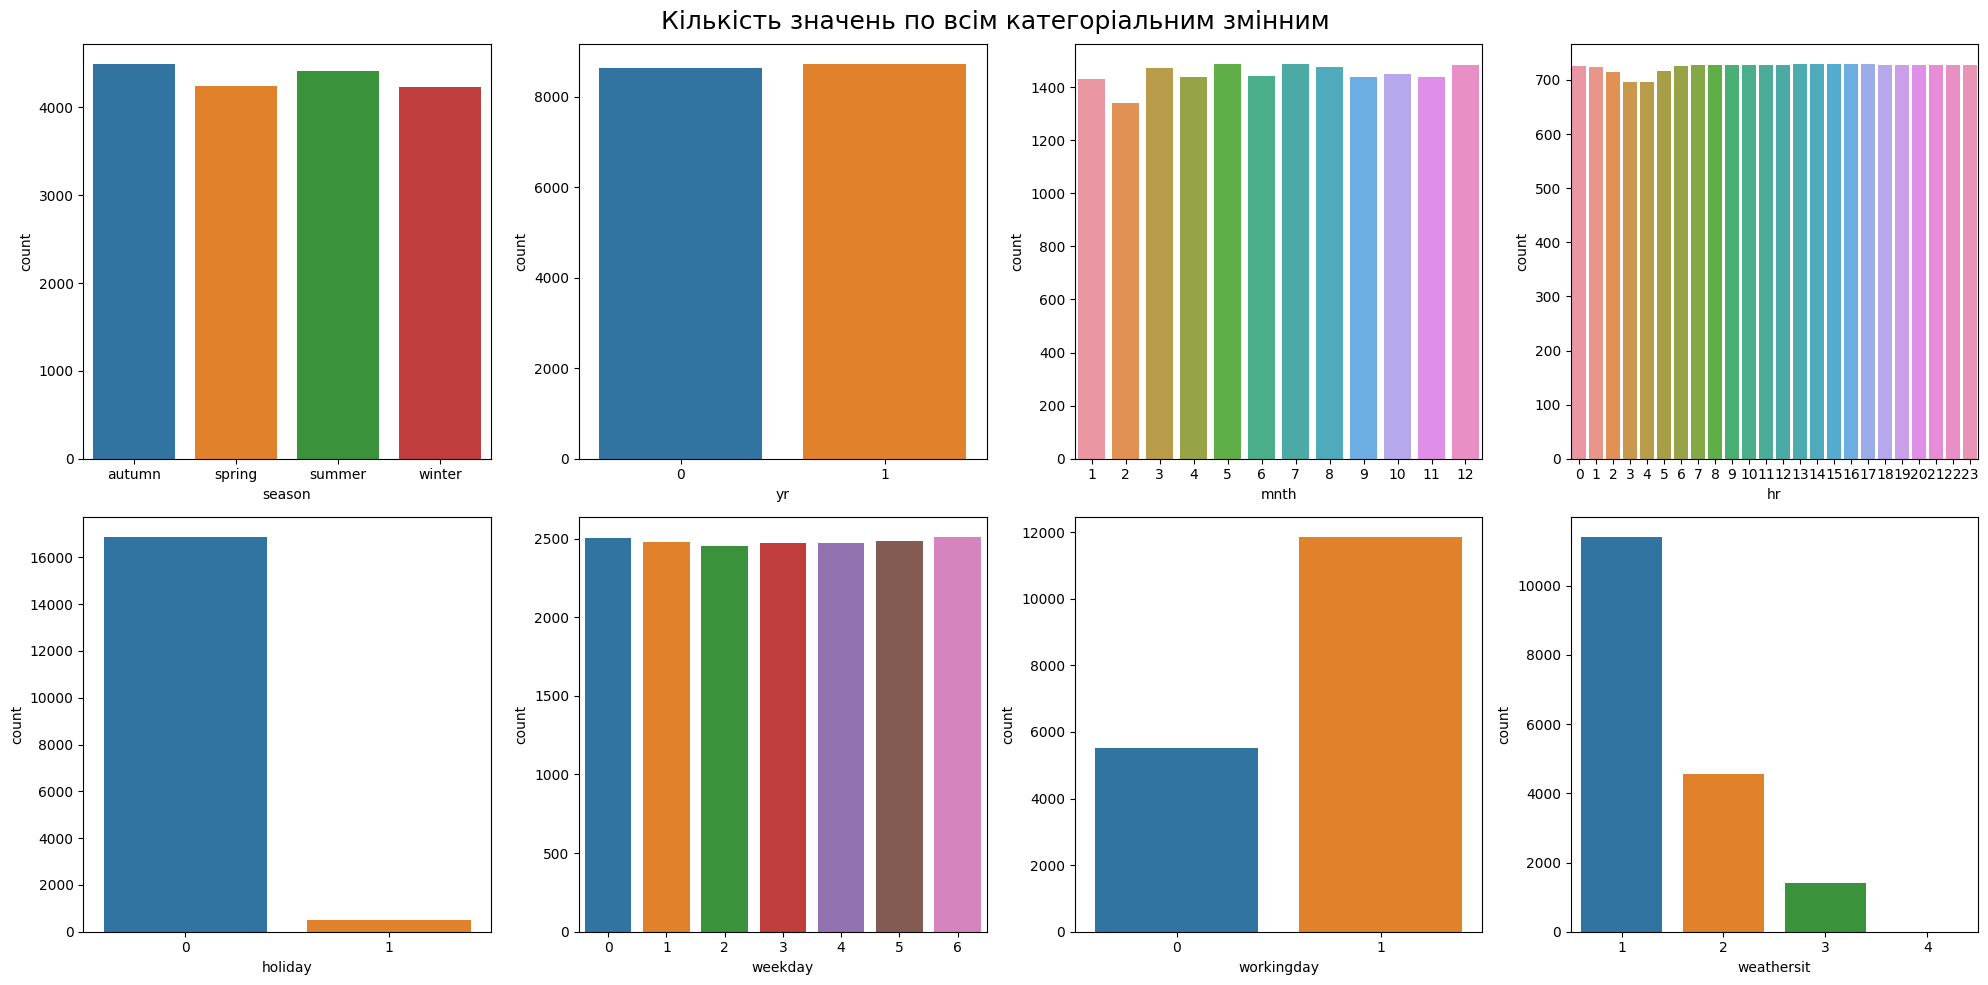

In [81]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
    sns.countplot(data=data_categorical, x=variable, ax=subplot)
fig.suptitle('Кількість значень по всім категоріальним змінним', fontsize=18)
fig.tight_layout()
plt.show()

**Висновки з 5-7 завдання (детальні)**

**Висновки**

*Завдання 5.* В даному завданні ми перетворювали змінні в категоріальний тип. Використовували метод Pandas `Categorical()`. Такі дії вживаються через оптимізацію датасету та швидшої обробки даних, наприклад в нас є атрибут `holiday` з типом `int64`, але це займає набагато більше місця аніж `category`. Атрибути, які ми категорізували: 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'.

*Завдання 6.* В даному завданні ми перетворювали атрибут `season` в числову шкалу. Для цього ми використовували словник з ключами - назвами сезону та значеннями - числами.

*Завдання 7.* В даному завданні ми будували сітку `countplot`ів по всім категоріальним змінним. Щоб легше побудувати таку сітку, ми розбили фігуру на `subplots`. Далі ми 'склеїли' значення з атрибутами `data_categorical` з осями. Шоб отримати усі осі, ми зробили зглажування списку списків за допомогою `ax.flatten()`. Та циклом побудували усі графіки, передаючи `subplot`. З приводу аналізу, так як відстеження було кожну годину, то маємо шо розподіл даних по сезонам, годинам, дням, місяцям, рокам є однакова.


# Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [65]:
to_exclude = [*categorical_attrs]
data_numerical = data.select_dtypes(include=np.number)
data_numerical = data_numerical.iloc[:, ~data_numerical.columns.isin(to_exclude)]

In [66]:
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       17379 non-null  float64
 1   atemp      17379 non-null  float64
 2   hum        17379 non-null  float64
 3   windspeed  17379 non-null  float64
 4   cnt        17379 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 814.6 KB


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

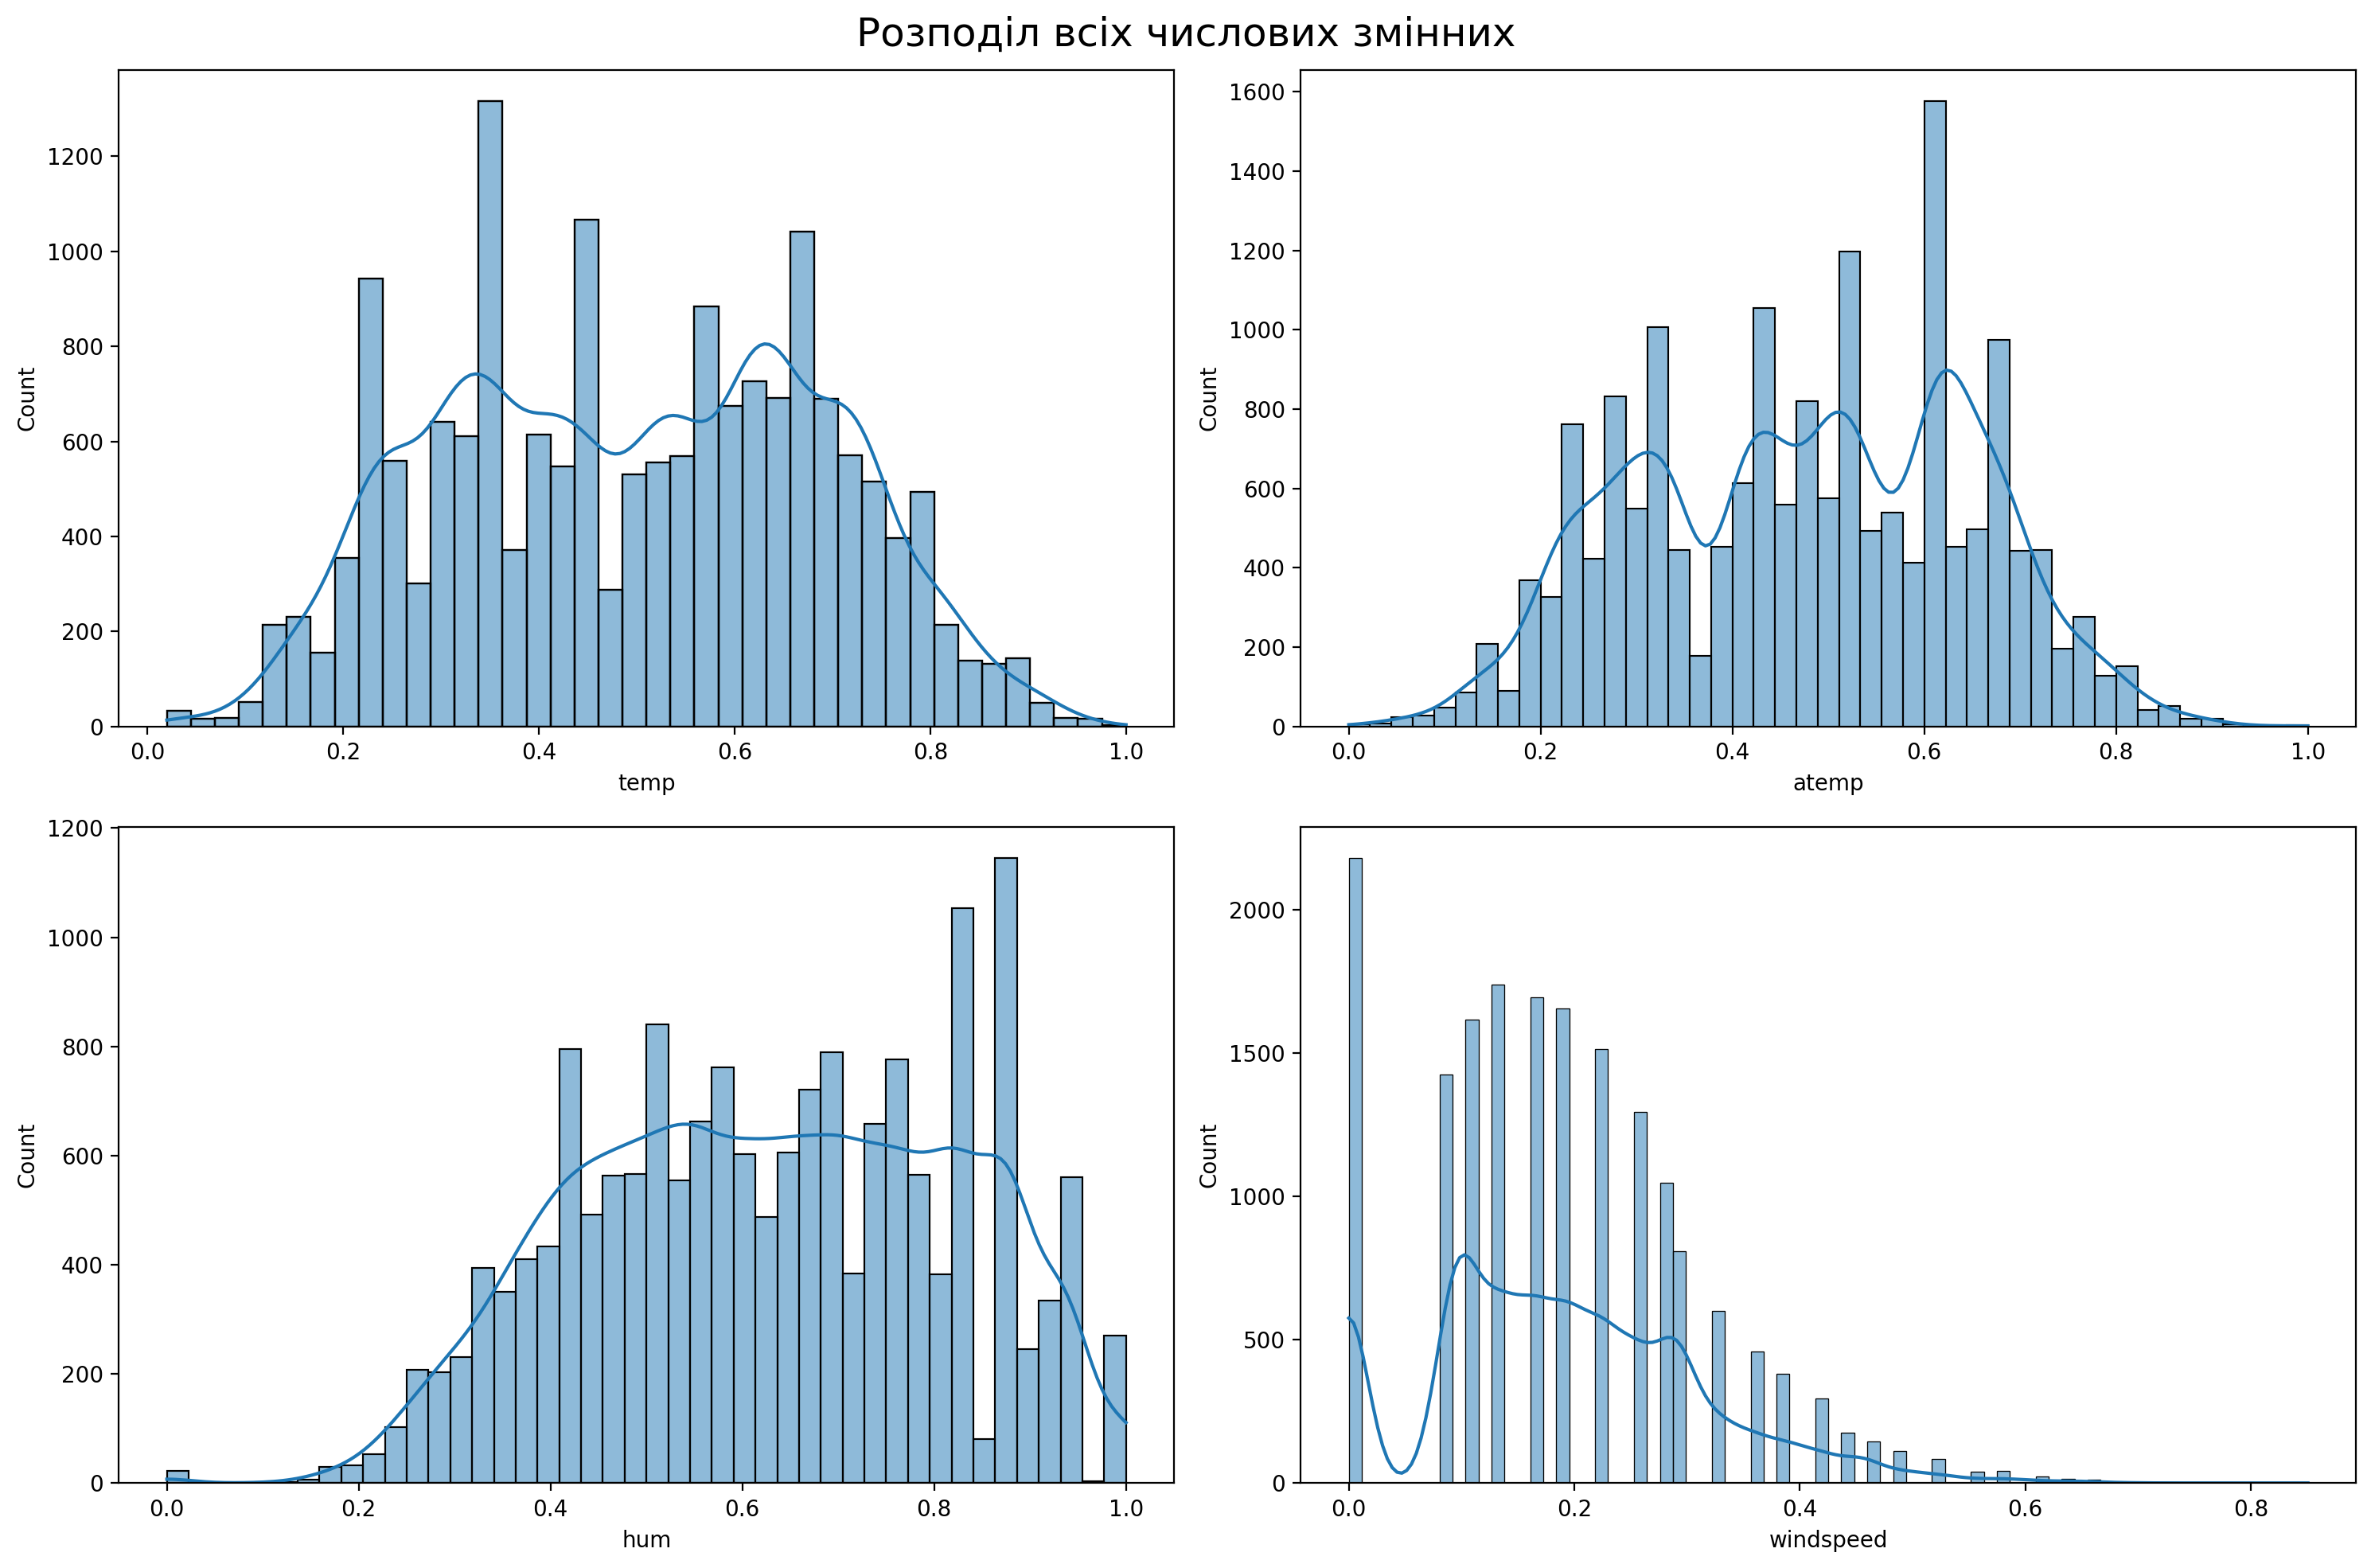

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), dpi=200)
for var, ax in zip(data_numerical, axs.flatten()):
    sns.histplot(data=data_numerical, x=var, ax=ax, kde=True)
fig.suptitle('Розподіл всіх числових змінних', fontsize=18)
fig.tight_layout()
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

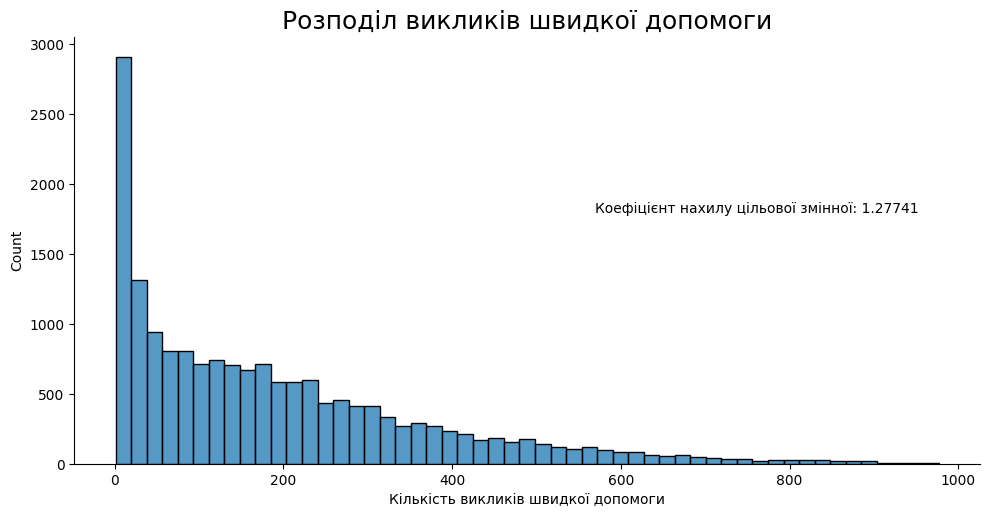

Коефіцієнт нахилу цільової змінної 1.2774116037490577


In [68]:
skew = data['cnt'].skew()

g = sns.displot(data=data, x='cnt', aspect=2)

ax = g.axes[0][0]
x_l, x_r = ax.get_xlim()
y_b, y_t = ax.get_ylim()
ax.text(x=x_r/1.8, y=y_t/1.7, s=f"Коефіцієнт нахилу цільової змінної: {skew:.5f}")
ax.set_xlabel('Кількість викликів швидкої допомоги')

plt.title('Розподіл викликів швидкої допомоги', fontsize=18)
plt.show()
print(f"Коефіцієнт нахилу цільової змінної {skew}")

**Висновки з 8-10 завдання (детальні)**

**Висновки**

*Завдання 8.* В даному завданні ми виділили числові змінні в окремий датасет. Щоб відокремити такі дані, ми використали збір за типами, використовуючи метод `select_dtypes(include=np.number)` та виключили цільову змінну `cnt` з отриманого датасету.

*Завдання 9.* В даному завданні ми побудували графіки розподілу всіх числових змінних. Можемо сказати, що розподіл темпаратур доволі нерівномірний, хоч на перший погляд і бачимо 'гладкі' нахили, але є значення, кількість яких виходе за межі 'гладкості'. Дещо красивіша картинка з вологістю, та дивний розподіл шкидкості вітру, на початку маємо стрибок кількості спостережень, спад та рівномірний розподіл.

*Завдання 10.* В даному завдання ми побудували графік розподілу викликів швидкої допомоги та визначили коефіцієнт нахилу даної змінної, який дорівнює ~1.27, що означає що наш розподіл має більшу кількість даних зліву, тобто на початку, аніж зправа вкінці.



# Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

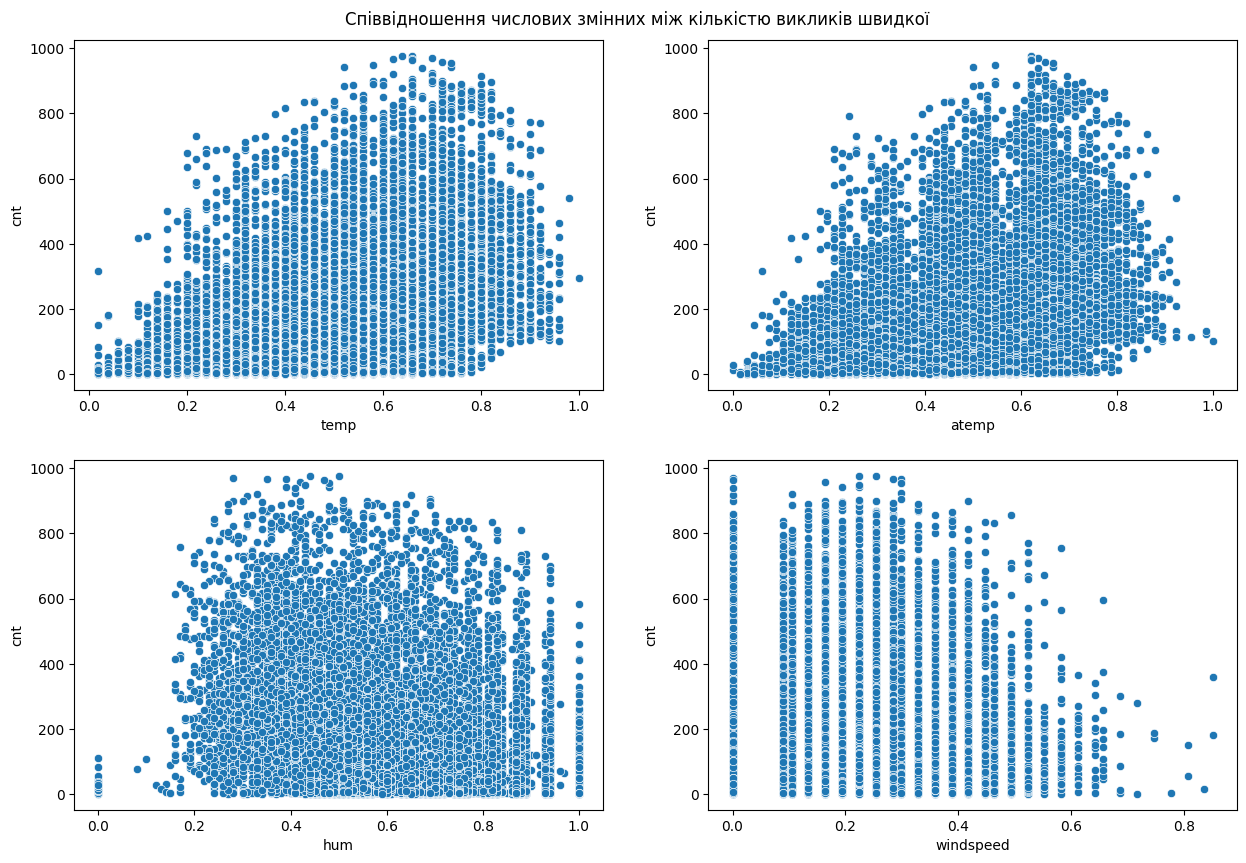

In [69]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
    sns.scatterplot(data=data_numerical, x=var, y=data_numerical['cnt'], ax=subplot)

fig.suptitle('Співвідношення числових змінних між кількістю викликів швидкої', y=0.91)    
plt.show()

**Завдання 12** побудуйте графіки співвідношення [`boxplot`](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

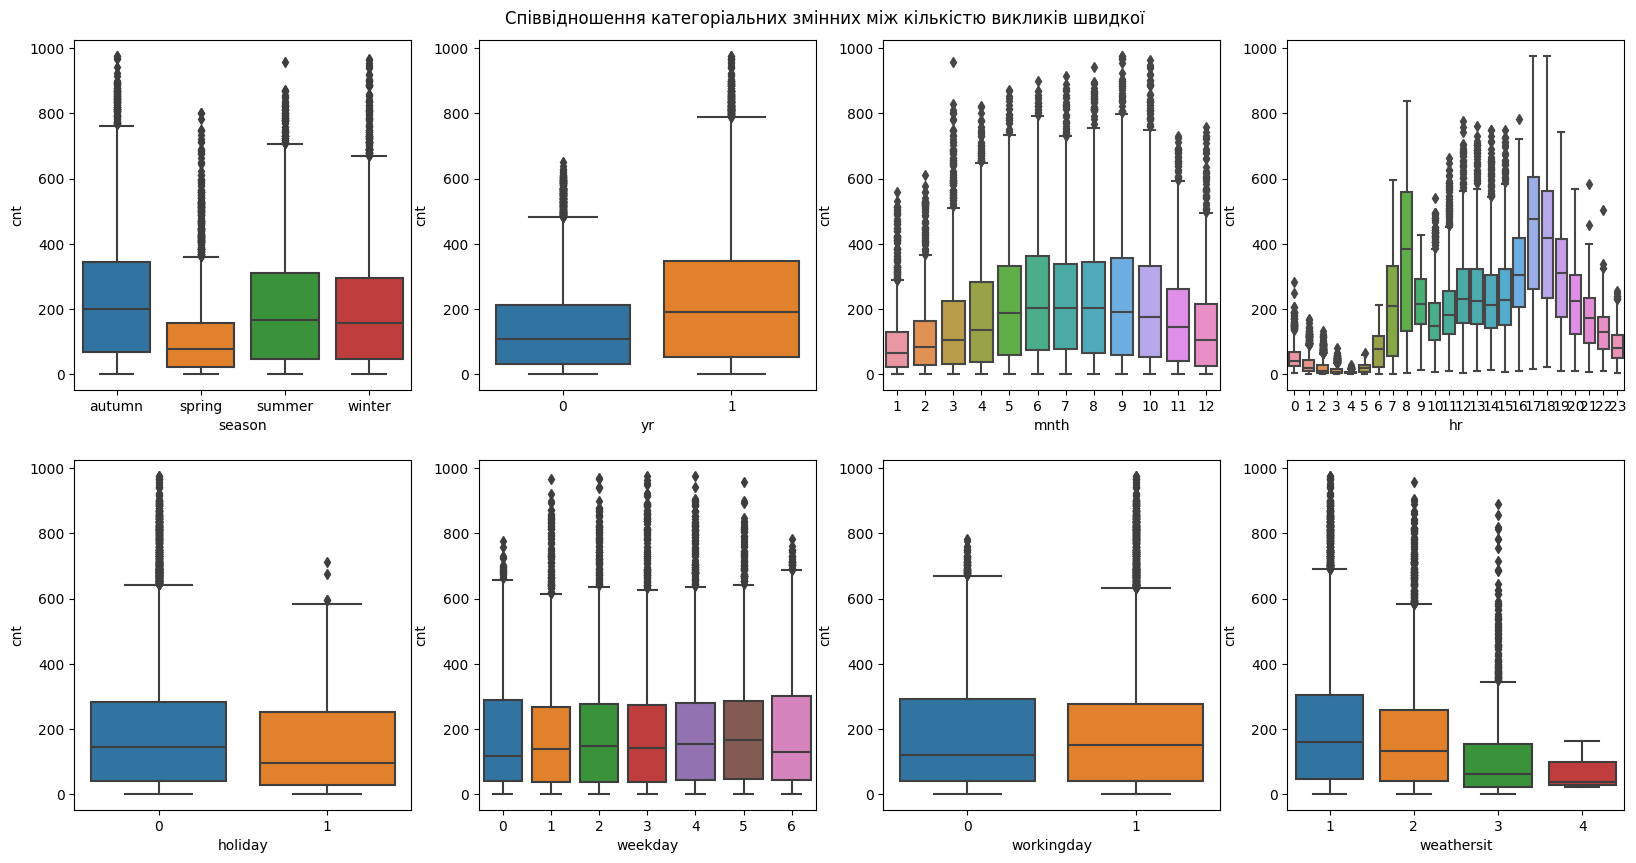

In [70]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
    sns.boxplot(data=data_categorical, x=var, y=data['cnt'], ax=subplot)

fig.suptitle('Співвідношення категоріальних змінних між кількістю викликів швидкої', y=0.91)
plt.show()

**Висновки з 11-12 завдання (детальні)**

**Висновки**

*Завдання 11.* В даному завданні ми побудували графіки `scatterplot` співвідношення числових змінних між кількістю викликів швидкої. З відображених даних, ми можемо сказати, що усі дані рівномірно розподілені, окрім деяких випадків зі швидкістю вітра, коли його значення досягає практикто максимальне значення, видно деякі випадки викликів швидкої, хоча на попередньому графіку з розподілом кількості записів такої швидкості повітря трапляєтся дуже рідко.

*Завдання 12.* В даному завданні ми побудували графіки `boxplot` співвідношення категоріальних змінних між кількістю викликів швидкої. Як бачимо, на графіках дуже багато аутлаєрів. Із цікавого, маємо що середня медіанна кількість викликів в 2012 була більше ніж в 2011 та менше всього викликів восени. Поглянемо більш детальніше та побачимо, що з 23 години по 6 дуже мала кількість випадків, а ось о 8 та о 17 випадків виклику швидкої було найбільше. Зростанням кількості випадків огладається з Квітня по Жовтень.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

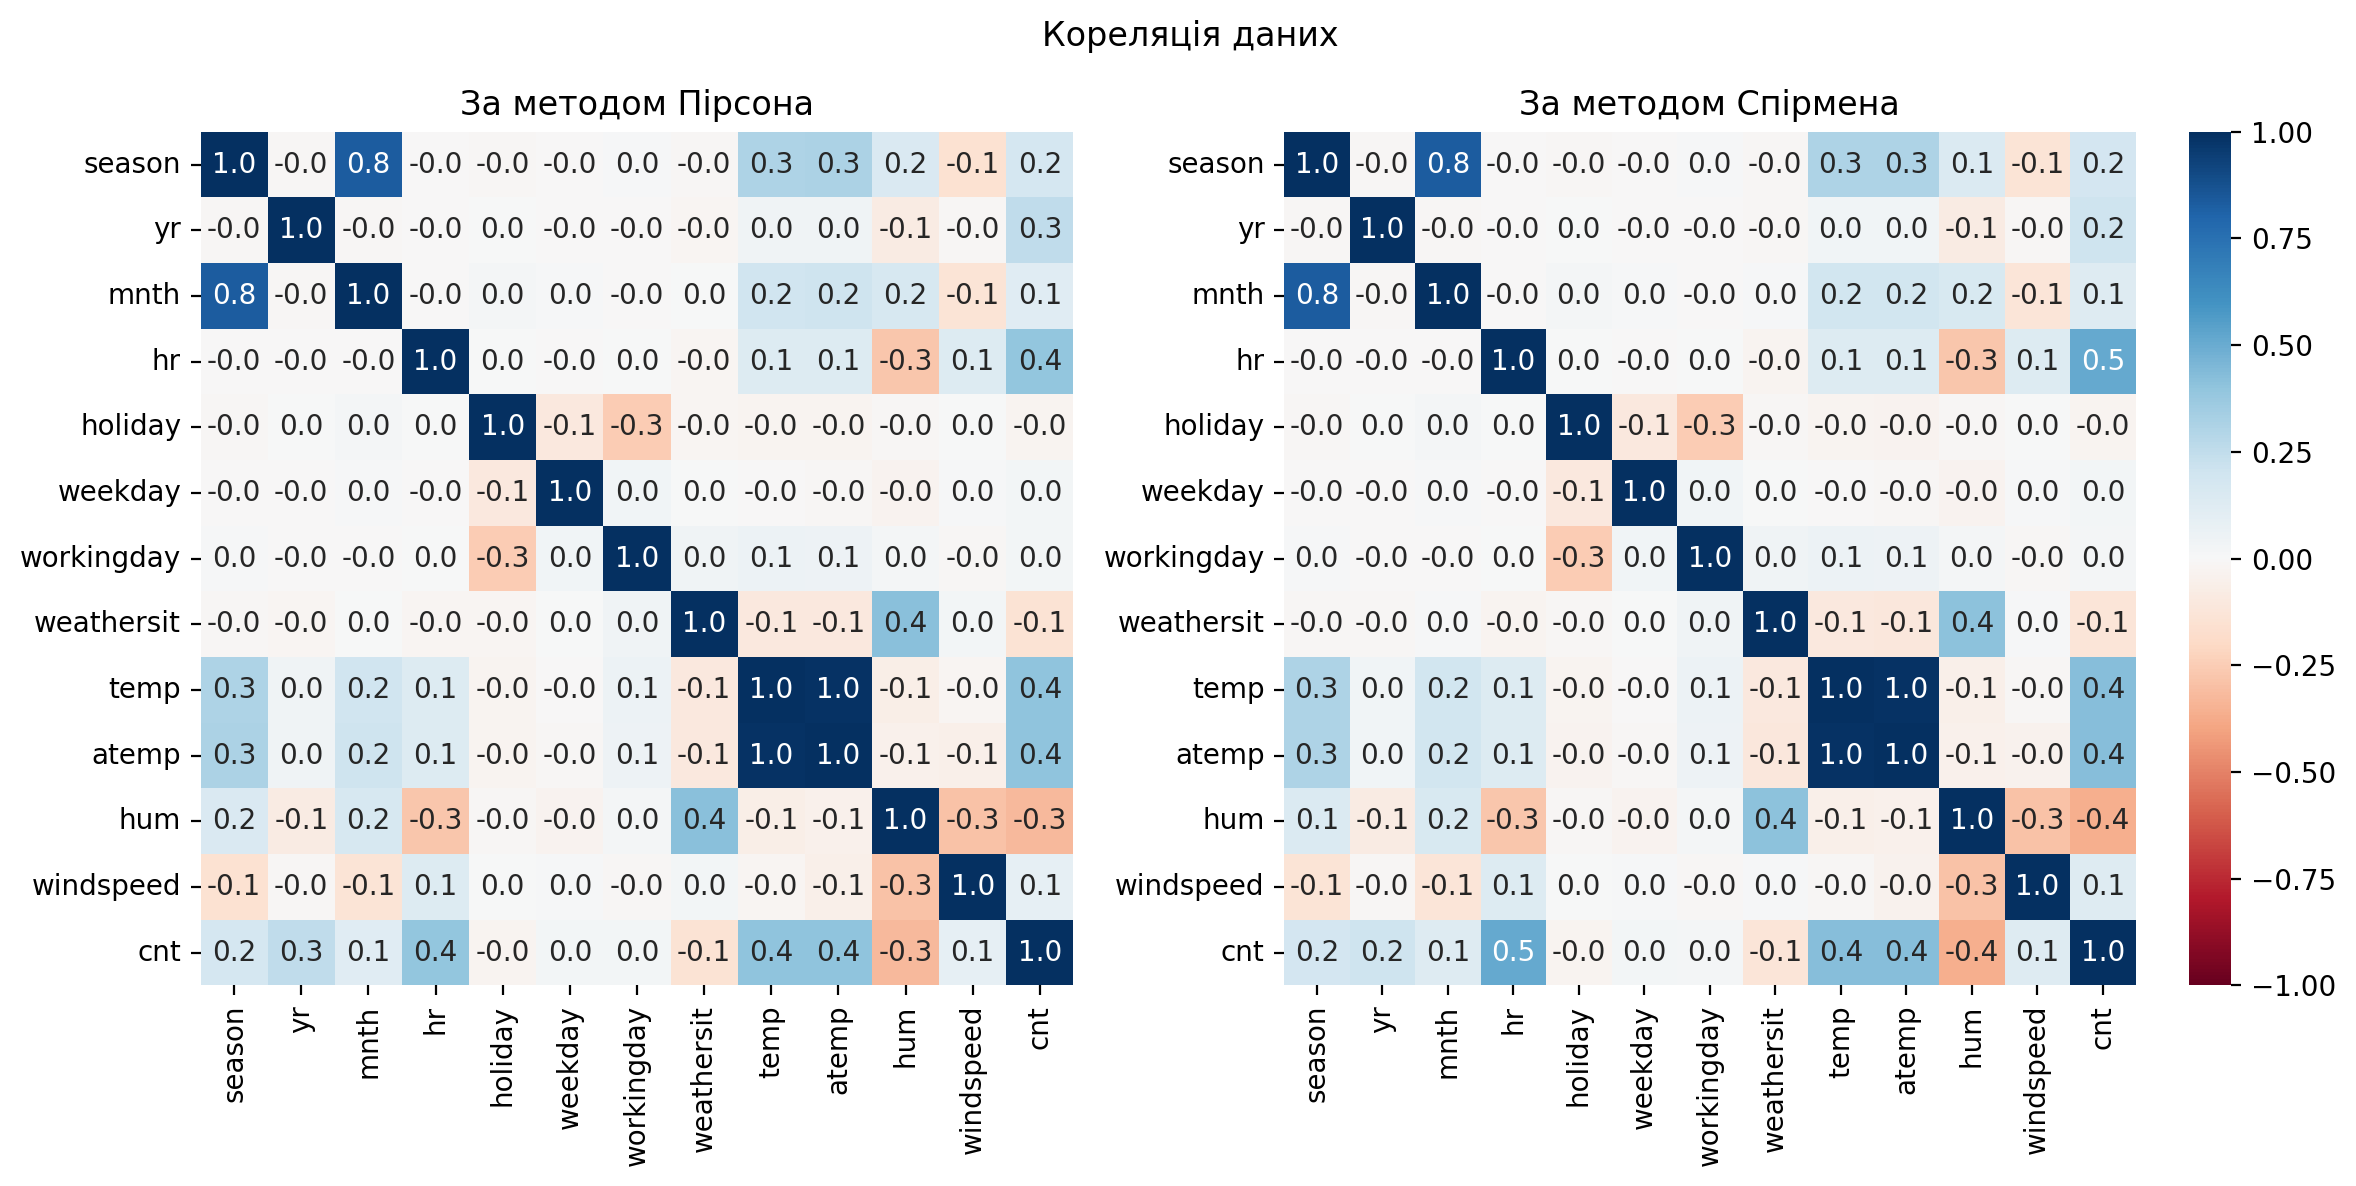

In [71]:
corr_pearson = data.corr(method='pearson', numeric_only=True)
corr_spearman = data.corr(method='spearman', numeric_only=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=200, gridspec_kw={'width_ratios': [0.82, 1]})

sns.heatmap(corr_pearson, ax=axs[0], annot=True, fmt='.1f', vmin=-1.0, vmax=1.0, center=.0, cmap="RdBu", cbar=False).set_title('За методом Пірсона')
sns.heatmap(corr_spearman, ax=axs[1], annot=True, fmt='.1f', vmin=-1.0, vmax=1.0, center=.0, cmap="RdBu").set_title('За методом Спірмена')


fig.suptitle('Кореляція даних')
fig.tight_layout()
plt.show()

**Висновки** 

*Завдання 13.* В даному завданні, ми вирахували кореляційні коефіцієнти за методами **Пірсона** та **Спірмена**. Дійсно, дані теплокарти відрізняються, але різниця дуже слаба. Основною відмінністю методу Пірсона від Спірмена є чутливість до аутлаєрів, перший метод дуже чутливий до таких випадків, тому гарною практикою є визначення коефіцієнтів обома методами перед заглибленням в детальний аналіз, бо аутлаєр може збити з пантелику. Також перший метод краще використовувати, коли в нас дані є монотонними та лінійно залежними, другий, в свою чергу, можна використовувати для нелінійних залежностей, але монотонних. Щоб визначити, якими є дані, можна зробити порівняння: якщо є дуже велика різниця між коефіцієнтами, то маємо, що дані монотонні нелінійні, далі потрібно зробити обробку даних, наприклад, видалення аутлаєрів.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [72]:
to_drop = [i for i in categorical_attrs if i != 'hr']

def get_dummies(df: pd.DataFrame):
    features = pd.concat([df, pd.get_dummies(df[categorical_attrs], columns=categorical_attrs)], axis=1)
    features = features.drop(to_drop, axis=1)
    return features


In [73]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [74]:
day_hours = list(range(6, 21))

features['night_hours'] = features['hr'].apply(lambda t: 0 if t in day_hours else 1)
features = features.drop('hr', axis=1)

**Модель лінійної регрессії**

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [75]:
features_lr = features.drop(['season_1', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0', 'atemp', 'date'], axis = 1)

In [76]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [77]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [78]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [79]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

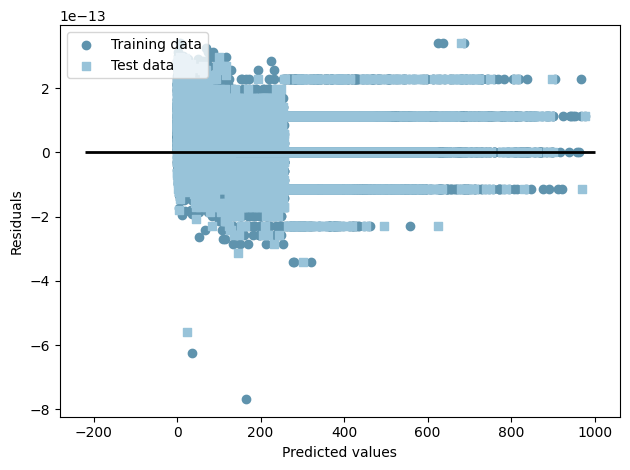

In [80]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**

**Висновки**

*Завдання 14.* В даному завданні ми навчилися будувати та навчати модель лінійної регресії. 

Спочатку ми отримали фіктивні змінні, щоб уникнути неправильного порядку категорій. Для цього ми використали метод Pandas `get_dummies()`. 

Далі ми видалили по одній фіктивній змінні з кожної категорії, щоб запобігти мультиколінеарності та видалили атрибути `atemp` бо в нас вже є атрибут `temp`, а також `date`, бо в нас і так достатньо часових атрибутів для навчання моделі. 

Наступним кроком ми поділили вибірку на `train` та `test` в пропорції 70/30, для цього ми використали метод sklearn `train_test_split()` та з 'сідом' `random_state` щоб наші предикти були постійно однакові для однакових даних.

Передостаннім кроком настаж саме тренування моделі, використовуючи об'єкт типу `LinearRegression`.

Головним та заключним етапом являється перевірка моделі. Для цього ми використовуємо розрахунок **Mean Square Error** та **R2 score**. Після обчислення, ми виявили, що наші дані успішно перебачені, бо `MSE diff = 0.0` та `R2 diff = 0.0`. Щоб наглядніше відобразити взаємозв'язок між залишками моделі та перебачуваними значеннями, ми побудували графік розсіювання за тестовими та тренувальними даними.